In [1]:
# Mayank Singla
# 111901030

In [2]:
# importing numpy as np
import numpy as np

# importing matplotlib.pyplot as plt
import matplotlib.pyplot as plt

t     | s(t)    | h(t)    | a(t)  | r(t)
---------------------------------------------
1     | 1.0     | 5.6     | 1     | 1
---------------------------------------------
2     | 1.0     | 4.8     | 1     | 1
---------------------------------------------
3     | 0.0     | 4.2     | 0     | 1
---------------------------------------------
4     | 0.0     | 3.8     | 0     | 1
---------------------------------------------
5     | 0.0     | 3.0     | 0     | 1
---------------------------------------------
6     | 0.0     | 2.8     | 0     | 1
---------------------------------------------
7     | 1.0     | 4.8     | 1     | 1
---------------------------------------------
8     | 1.0     | 5.0     | 1     | 1
---------------------------------------------
9     | 1.0     | 4.4     | 1     | 1
---------------------------------------------
10     | 1.0     | 4.8     | 1     | 1
---------------------------------------------
11     | 0.0     | 3.4     | 0     | 1
---------------------------------

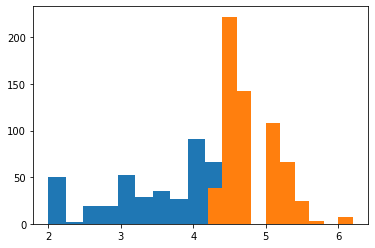

In [13]:
# Q1 - "Binary" pur

# Function to generate a random person out of a Kid or an Adult based on Probability of kid given
def generatePerson(pKid):
    pAdult = 1 - pKid   # pKid + pAdult = 1
    sKid = 0            # 0 for Kid
    sAdult = 1          # 1 for Adult
    rand = np.random.randint(1, 11);    # Generating random int b/w [1, 10]
    return sKid if (rand <= (pKid * 10)) else sAdult    # returning the result based on random number generated

# Function to generate the height of the Kid based on given distribution
def kidHeight():
    heights = np.array([2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4]) # Possible heights of Kid
    dist = np.array([0.01, 0.09, 0.005, 0.05, 0.045, 0.15, 0.008, 0.042, 0.13, 0.07, 0.22, 0.08, 0.1])  # Probability distribution of each possible height
    return np.random.choice(heights, p = dist)  # returning random height based on above distribution

# Function to generate the height of the Adult based on given distribution
def adultHeight():
    heights = np.array([4.2, 4.4, 4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 6.4]) # Possible heights of Adult
    dist = np.array([0.07, 0.17, 0.2, 0.23, 0.18, 0.1, 0.02, 0.01, 0.009, 0.006, 0.004, 0.001])  # Probability distribution of each possible height
    return np.random.choice(heights, p = dist)  # returning random height based on above distribution

# Agent function that takes height (observation) as input and returns whether it is a Kid or an Adult (action)
def agent1(height):
    # As the agent is an "idiot box", it ignores the height info and randomly tells Kid or Adult with probability of 0.5 each
    # return generatePerson(0.5)
    if (height >= 2 and height < 4.2):
        return 0
    elif (height > 4.4 and height <= 6.4):
        return 1
    else:
        return generatePerson(0.5)

# Environment Function that takes action as input and returns observation and reward
def environment1(action = -1, state = -1):
    # Observation
    if action == -1:    # We need to tell which person it is and height of that person
        person = generatePerson(0.4)    # Generating a random person with probability of a Kid = 0.4
        height = adultHeight() if (person == 1) else kidHeight()    # Generating the height accordingly as per person
        return np.array([person, height])   # Returning the generated person and height of that person
    else:   # Checking action of the agent
        return 1 if (action == state) else 0    # if guessed correct, reward back 1 else 0

totalReward1 = 0    # To keep track of sum of rewards obtained by the agent
dataPoints1 = 1000  # Number of data points to generate
heightKids = []     # To store the height of Kids obtained
heightAdults = []   # To store the height of Adults obtained

# 1)
print("t     | s(t)    | h(t)    | a(t)  | r(t)")
print("---------------------------------------------")

for t in range(dataPoints1):    # For every data point
    # person = s(t), height = o(t)
    [person, height] = environment1()   # Get the observation by the environment
    if person == 1: # Storing the height
        heightAdults.append(height)
    else:
        heightKids.append(height)
    guess = agent1(height)  # Getting the action by the agent, guess = a(t)
    reward = environment1(guess, person)    # Get reward by the environment, reward = r(t)
    totalReward1 += reward  # Adding the reward obtained
    print(t+1, "    |", person, "    |", height, "    |", guess, "    |", reward)
    print("---------------------------------------------")

# 2)
plt.hist(heightKids)    # Plotting heights of Kid
plt.hist(heightAdults)  # Plotting heights of Adult

# 3)
print("Performance of Agent:", (totalReward1 / dataPoints1))   # Performance of the agent, i.e. average reward

In [4]:
# Q2 - Room Cleaner Robot

xsize = ysize = 5   # Dimensions of the room
room = np.zeros((xsize, ysize)) # The room of size (xsize X ysize)
dirtLocationCount = 10  # Number of places having dirt
[[currX, currY]] = np.random.randint(0, xsize, (1, 2))  # The initial position of the Robot

dx = [0, -1, 0, 1]  # Increment for 4 directions - Right / Up / Left / Down
dy = [1, 0, -1, 0]  # Increment for 4 directions - Right / Up / Left / Down

count = 0   # count to keep track of number of random dirt locations filled
# room[i][j] = 1 if there is dirt at that place, 0 otherwise
while count < dirtLocationCount:    # Filling dirty locations
    [[newX, newY]] = np.random.randint(0, xsize, (1, 2))    # Generating a random point in the room
    if room[newX][newY] != 1:   # If that position has no dirt already, fill it with dirt
        count += 1
        room[newX][newY] = 1

# Agent function that takes (currX, currY) (observation) as input and returns the random action performed by the Robot
# Possible Actions
# 0 - Move Right
# 1 - Move Up
# 2 - Move Left
# 3 - Move Down
# 4 - Pick Dirt
def agent2(currX, currY):
    # As the robot is an "idiot box", it ignores the current location of robot and randomly performs the action
    return np.random.randint(0, 5)

# Environment function that takes action of robot as input and returns the observation and reward
def environment2(action):
    if action == 4:                 # If action is to pick the Dirt
        if room[currX][currY] == 1: # If that location has dirt
            room[currX][currY] = 0  # Picking the dirt and making that location clean
            return [[currX, currY], 1]
        else:                       # There is no dirt at that location
            return [[currX, currY], -1]

    xNew = currX + dx[action]   # New possible x position of robot
    yNew = currY + dy[action]   # New possible y position of robot

    if xNew < 0 or yNew < 0 or xNew >= xsize or yNew >= ysize:  # If robot hits the wall
        return [[currX, currY], -10]
    else:                            # Else move to that position
        return [[xNew, yNew], 0]

print("Initial Room:") # Print initial room
print(room)
print("---------------------------------------------------------")
print("---------------------------------------------------------")

totalReward2 = 0    # To keep track of sum of rewards obtained by the agent
dataPoints2 = 10    # Number of data points to generate

# 1)
print("      |   prev Location  |   new Location  |       |     ")
print("t     |      s(t)        |        o(t)     | a(t)  | r(t)")
print("---------------------------------------------------------")

for t in range(dataPoints2):    # For every data point
    action = agent2(currX, currY)   # Get the action from the Agent
    prevX = currX   # Previous x-position of robot
    prevY = currY   # Previous y-position of robot
    [[newX, newY], reward] = environment2(action)   # Get observation and reward from the environment
    currX = newX    # Moving the robot to newX
    currY = newY    # Moving the robot to newY
    totalReward2 += reward  # Adding the reward obtained
    print(t+1, "    |", [prevX, prevY], "          |", [currX, currY], "         |", action, "    |", reward)
    print("New state of Room:")
    print(room)
    print("---------------------------------------------------------")

# 2)
print("Performance of Agent:", (totalReward2 / dataPoints2))   # Performance of the agent, i.e. average reward

Initial Room:
[[0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1.]]
---------------------------------------------------------
---------------------------------------------------------
      |   prev Location  |   new Location  |       |     
t     |      s(t)        |        o(t)     | a(t)  | r(t)
---------------------------------------------------------
1     | [0, 4]           | [0, 4]          | 0     | -10
New state of Room:
[[0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1.]]
---------------------------------------------------------
2     | [0, 4]           | [0, 4]          | 0     | -10
New state of Room:
[[0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1.]]
---------------------------------------------------------
3     | [0, 4]           | [0, 4]          | 4     | -1
New state of Room:
[[0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0.]
 [1. 0. 